# 데이터 전처리 (데이터 인코딩)

## 데이터 전처리 

기본 데이터 전처리 사항
- 결손값 / 문자열 값 처리
- 이상치 제거
- 피처 선택

데이터 인코딩
- 레이블 인코딩
- 원-핫 인코딩

피처 스케일
- StandardScaler
- MinMaxScaler

데이터 전처리 (Data Processing)
- ML 알고리즘은 데이터에 기반하고 있기 때문에 
- 어떤 데이터를 입력하느냐에 따라 결과도 크게 달라진다

사이킷런 ML 알고리즘의 데이터 기본 조건
- 모든 데이터는 숫자형(정수, 실수) (문자열 안 됨)
- 데이터에 빈 값(null 값) 없어야 함 (Null 안 됨)

사이킷런의 ML 알고리즘 적용 전 기본 처리 사항
- 결손값 처리
- 문자열 값 처리

결손값 처리
- NaN, Null 값 허용 안 됨
- NaN, Null 값을 고정값으로 변화시켜야 함 
- 평균값으로 대체하거나, 해당 피처 제외 등
- 주의!! : Null 값을 잘못 처리 할 경우 예측이 왜곡된다. 예측 왜곡이 심각하다.

문자열 값 처리
- 문자열 값을 입력 값으로 허용하지 않음
- 인코딩 처리하여 숫자형으로 변환 
- 카테고리형 피처는 코드값으로 표현
- 텍스트형 피처는 피처 벡터화 기법으로 벡터화 (텍스트 분석 시 별도 설명)
- 불필요한 피처는 삭제 처리 
- 예 : 주민번호, 단순 문자열 아이디 등
    - 단순히 데이터 행 식별하는 용도로 사용될 뿐
    - 예측하는 중요한 요소가 될 수 없다
    - 오히려 알고리즘을 복잡하게 만들어서 예측 성능을 떨어지게 함.
    

In [ ]:
# 참고
# 피처 벡터화 : 텍스트를 숫자형 벡터 값으로 변환하는 것 

피처선택 / 추출 / 가공
- 피처가 많을 때 어떤 피처를 선택할 것인가
- 우수한 특정 피처만 선택해서 처리하는 것이 좋을 때가 있음.
- 중요도순으로 피처 선택 (피처중요도)


머신러닝의 대표적인 인코딩 방식 
- 레이블 인코딩 (Label Encoding)
- 원-핫 인코딩 (One-Hot-Encoding)


레이블 인코딩
- 문자열 카테고리 값을 숫자형 카테고리 값으로 변환 

예 : 상품 데이터
- 상품 구분 : TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 
- 숫자로 변환
    TV : 1, 
    냉장고 : 2,
    전자레인지 : 3,
    컴퓨터 : 4,
    선풍기 : 5,
    믹서 : 6
        
- 주의! : 01, 02는 문자열이므로 1, 2로 변환해야 한다. 

In [ ]:
#그림11

### 레이블 인코딩 예쩨

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [2]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [3]:
# LableEncoder 객체 생성한 후
# fit()과 transform() 메서드로 label 인코딩 수행
encoder=LabelEncoder() #객체 형성
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
# 인코딩 전 원래의 값 확인 : classes_ 속성

In [5]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [4]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [7]:
# 인코딩 된 값 디코딩 : inverse_transform()
print('디코딩 원본 값:',encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

디코딩 원본 값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [8]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 3, 3, 2]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '선풍기' '선풍기' '믹서']


In [ ]:
레이블 인코딩 방식 주의
- 간단하게 문자열 값을 숫자형 값으로 변환하지만 
- 이는 단순 코드일 뿐 크기와는 상관 없음
- 일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생하게됨
- 왜냐하면,숫자 값의 크기 특성이 작용되기 때문에 그러하다.
- 즉, 냉장고가 1 믹서가 2로 변환되면 숫자기때문에 1보다 2가 더 큰 값이므로
- 가중치가 부여되거나 더 중요하게 인식될 가능성이 발생한다.

- 그래서 이러한 특성때문에 주의!해야 할 점!이
- 레이블 인코딩은 선형! 회귀!와 같은 ML 알고리즘에서는 적용하지 않음!
- 트리 계열!의 ML머신러닝 알고리즘은 숫자의 이러한 특성을 반영하지 않기때문에
- 레이블 인코딩 적용!시에 문제 없다.



In [ ]:
### 원-핫 인코딩 (One-Hot Encoding)
- 행 형태의 피처값을 열 형태로 바꾸는거임
- 행 형태의 피처값을 열 형태로 변환한 뒤
- 피처 값 인덱스에 해당하는 칼럼에는 1로 표시하고 
- 나머지 칼럼에는 0으로 표시하는 방식 

In [ ]:
#그림12

사이킷런에서 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환
    
원-핫 인코딩 과정
(1) 문자열 값을 숫자형 값으로 변환 (레이블 인코딩 사용)
(2) 입력 값을 2차원 데이터로 변환
(3) OneHotEncoder 클래스로 원-핫 인코딩 적용
    - fit()
    - transform()

### 원-핫 인코딩 예제

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [11]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [16]:
# (1) 먼저 숫자값으로 변환을 하기 위해 LabelEncoder 사용해서 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
labels       # 8개

array([0, 1, 4, 5, 3, 3, 2, 2])

In [17]:
# (2) 입력 값을 2차원 데이터로 변환
labels=labels.reshape(-1,1)   # 뒤에 숫자는 열조정해주는것임
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [18]:
labels=labels.reshape(-1,2)   # 알아서 2열로 만듬 
labels

array([[0, 1],
       [4, 5],
       [3, 3],
       [2, 2]])

In [19]:
labels=labels.reshape(-1,4)   # 알아서 4열로 만듬 
labels

array([[0, 1, 4, 5],
       [3, 3, 2, 2]])

In [20]:
labels=labels.reshape(4,-1)   # 알아서 4행으로 만듬 
labels

array([[0, 1],
       [4, 5],
       [3, 3],
       [2, 2]])

In [21]:
labels=labels.reshape(3,-1)   # 나눌 수 없게 지정 시 오류남 #조심! 
labels

ValueError: cannot reshape array of size 8 into shape (3,newaxis)

In [24]:
# (2) 입력 값을 2차원 데이터로 변환
labels=labels.reshape(-1,1)   # 컬럼 수 1로 고정, 행의 수는 자동으로 구성(-1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [29]:
# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
oh_labels   
#8행6열로 만들어짐

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [34]:
print('원-핫 인코딩 데이터')
print(oh_labels.shape)  #8행 6열
print(oh_labels.toarray())


원-핫 인코딩 데이터
(8, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [35]:
print('원-핫 인코딩 데이터 차원')
print(oh_labels)  
# 1 값 위치 출력

# 0행 0열에 1이 들어가 있다
# 1행 1열에 1이 들어가 있다
# (2,4) : 2행 4열 위치에 1이 들어가 있다

원-핫 인코딩 데이터 차원
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [37]:
# 원-핫 인코딩 전체 과정 
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# (1) 먼저 숫자값으로 변환을 하기 위해 LabelEncoder 사용해서 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

# (2) 입력 값을 2차원 데이터로 변환
labels=labels.reshape(-1,1)   # 컬럼 수 1로 고정, 행의 수는 자동으로 구성(-1)

# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)


print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)  

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
# 그림13

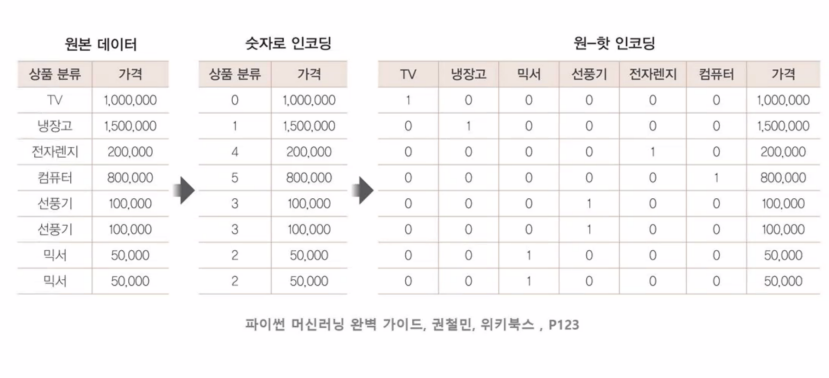

In [ ]:
# Pandas API 사용해서 원-핫 인코딩 수행 
# get_dummies() 사용
# 숫자 변환 과정을 거치지 않고 바로 원-핫 인코딩 변환 가능


In [38]:
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

In [39]:
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [40]:
pd.get_dummies(df)  # 숫자 변환 과정을 거치지 않고 바로 원-핫 인코딩 변환 가능 

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [41]:
# Pandas 데이터 프레임을 NumPy 배열로 변환
pd.get_dummies(df).to_numpy()

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

### 피처 스케일링과 정규화 

피처 스케일링 (Feature Scaling)
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화 (Standardization)
- 정규화 (Nomalization)

표준화 (Standardization)
- 데이터의 피처 각 평균이 0이고 분산이 1인
- 가우시안 정규 분포(표준 정규 분포)를 가지는 값으로 변환하는 것



참고

사전에 표준화를 적용해야 하는 알고리즘 
- 선형 회귀
- 로지스틱 회귀
- RBF 커널을 이용하는 서포트 벡터 머신
- 이들 알고리즘은 데이터가 가우시안 정규 분포(표준 정규 분포)를 가지고 있다고 
- 가정하고 구현했기때문에 사전에 표준화 적용을 함으로써 
- 예측 성능을 향상시킬 수 있음 



정규화 (Nomalization)
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 것 

예: 
    - 피처 A : 거리를 나타내는 변수 값 0 ~ 100km
    - 피처 B : 금액을 나타내는 변수 값 0 ~ 100,000,000원 

- 동일한 크기 단위로 비교하기 위해서 최소 ~ 최대 범위를 0 ~ 1로 변환 


In [ ]:
사이킷런에서 제공하는 대표적인 피처 스케일링 클래스
- StandardScaler
- MinMaxScaler


In [ ]:
StandardScaler
- 사이킷런 표준화 지원 클래스
- 개별 피처를 평균 0이고 분산이 1인 값으로 변환 


### StandardScaler 사용 예제 

In [48]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 로디하고 데이터프레임으로 변환 

iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
#iris_df

print('피처들의 평균 값:')
print(iris_df.mean())

print('\n피처들의 분산 값:')
print(iris_df.var())

피처들의 평균 값:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

피처들의 분산 값:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
StandardScaler 이용 표준화해서 변환
(1) StandardScaler 객체 생성
(2) fit() : 데이터 변환을 위한 기준 정보 설정
(3) transform() : fit()에서 설정된 정보를 이용해서 데이터 변환
    - scale 변환된 데이터 세트는 numpy ndarray로 반환 
    

In [51]:
# StandardScaler 이용 표준화해서 변환
from sklearn.preprocessing import StandardScaler

# (1) StandardScaler 객체 생성
# scaler = (1) StandardScaler 객체 생성
scaler=StandardScaler()

# (2)(3) : 데이터 셋 변환 : fit()/tansform() 사용
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df) # numpy ndarray 반환

# numpy ndarray를 DataFrame으로 변환 
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('피처들의 평균 값:')
print(iris_df_scaled.mean())

print('\n피처들의 분산 값:')
print(iris_df_scaled.var())

# 모든 컬럼 값의 평균이 0에 아주 가까운 값으로 변환됨
# 분산은 1에 아주 가까운 값으로 변환 

피처들의 평균 값:
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

피처들의 분산 값:
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
# (1) StandardScaler 객체 생성
# scaler = (1) StandardScaler 객체 생성
scaler=StandardScaler()
scaler

In [ ]:
# (2)(3) : 데이터 셋 변환 : fit()/tansform() 사용
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df) # numpy ndarray 반환
iris_scaled

In [ ]:
# numpy ndarray를 DataFrame으로 변환 
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled

In [ ]:
print('피처들의 평균 값:')
print(iris_df_scaled.mean())

print('\n피처들의 분산 값:')
print(iris_df_scaled.var())

In [54]:
# 참고 : numpy 사용 평균 구하기
iris_scaled.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [55]:
# 참고 : numpy 사용 분산 구하기
iris_scaled.var(axis=0)

array([1., 1., 1., 1.])

In [56]:
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [57]:
iris_df_scaled   # 표준화 변환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
MinMaxScaler
- 데이터값을 0과 1사이의 범위 값으로 변환
- 음수인 경우에는 -1에서 1사이의 값으로 변환
- 데이터의 분포가 가우시안 분포가 아닌 경우 Min, Max Scale을 적용해서 볼 수 있음

In [ ]:
MinMaxScaler 이용해서 변환하는 과정

(1) MinMaxScaler 객체 생성
(2) fit()
(3) transform() : scale 변환된 데이터 세트는 numpy ndarray로 반환 

### MinMaxScaler 사용 예제 

In [61]:
from sklearn.preprocessing import MinMaxScaler

# (1) MinMaxScaler 객체 생성
scaler=MinMaxScaler()

# (2)(3) 변환
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# numpy ndarray를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('피처들의 최소 값:')
print(iris_df_scaled.min())

print('\n피처들의 최대 값:')
print(iris_df_scaled.max())

# 모든 피처 값이 0 ~ 1 사이의 값으로 변환됨 


피처들의 최소 값:
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

피처들의 최대 값:
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
# (1) MinMaxScaler 객체 생성
scaler=MinMaxScaler()
scaler

In [ ]:
# (2)(3) 변환
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
iris_scaled

In [ ]:
# numpy ndarray를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled

In [ ]:
print('피처들의 최소 값:')
print(iris_df_scaled.min())

print('\n피처들의 최대 값:')
print(iris_df_scaled.max())


In [62]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점 
- 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달라지지 않게 주의 
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에
- 반드시 테스트 데이터는 학습 데이터의 스케일러 기준에 따라야 한다
- Scaler 객체를 이용해서 학습 데이터 세트로 fit()과 transform()을 적용하면
- 테스트 데이터에 다시 fit()을 적용해서는 안 되며
- 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해서 transform()으로
- 변환해야 함.                                   